In [1]:
import numpy as np
import pandas as pd
from scipy.io.wavfile import read 
import os
import librosa
import matplotlib.pyplot as plt
from algorithms import plot_frequency_db


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Storing the address in 'url' variable
data_path = "dsl_data/development.csv"
# Importing the file from the address contained in 'url' into 'df' 
df = pd.read_csv(data_path)

In [4]:
# Check null values in Training dataset (pandas dataframe)
df.isnull().sum().sum()

0

In [5]:
df.shape

(9854, 10)

In [6]:
import encode_dict_data  

df['gender'] = df['gender'].map(encode_dict_data .gender_map)
df['Self-reported fluency level '] = df['Self-reported fluency level '].map(encode_dict_data .language_fluency_map)
df['ageRange'] = df['ageRange'].map(encode_dict_data .age_range_map)
df['Current language used for work/school'] = df['Current language used for work/school'].map(encode_dict_data .current_language_map)
df['First Language spoken'] = df['First Language spoken'].map(encode_dict_data .first_language_map)


# Try to combine action & object in 1 column
df["action-object"] = df['action'].astype(str) +"-"+ df["object"]



AttributeError: module 'matplotlib' has no attribute 'grid'

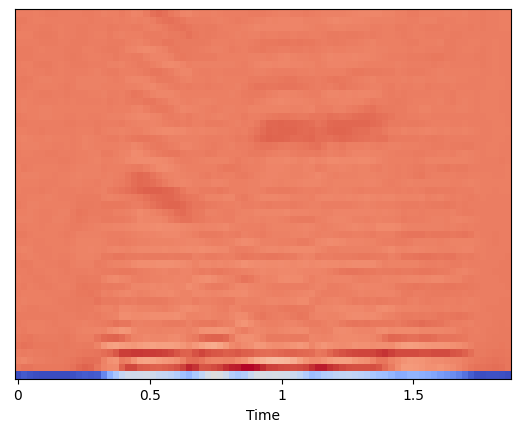

In [7]:

df = df.iloc[:15]

duration_array = []
zcr_mean_array = []
zcr_std_array = []
mfcc_array = []
chroma_cens_array = []
centroid_mean_array = []
centroid_std_array = []
flux_mean_array = []
flux_std_array = []
rolloff_mean_array = []
rolloff_std_array = []
rate_array = [] 
from algorithms import plot_mfcc



for audio in df['path']:
    # Load audio files (wav) as amplitude and rate using 
    # Default rate: 22050
    data ,rate = librosa.load(audio)
    


    # # Calculate zero crossing rate
    # zcr = librosa.zero_crossings(data)

    # # Calculate mean of zero crossing rate
    # zcr_mean = np.mean(zcr)
    # zcr_mean_array.append(zcr_mean) 

    # # Calculate standard deviation of zero crossing rate
    # zcr_std = np.std(zcr)
    # zcr_std_array.append(zcr_std) 

    # #  extract Mel-Frequency Cepstral Coefficients (MFCCs) from audio signal and compute mean on rows
    mfcc = librosa.feature.mfcc(y=data, sr=rate, n_mfcc=50)
    # mfcc_mean = np.mean(mfcc,axis=1)

    # mfcc_array.append(mfcc_mean) 
   
    # Extract Chroma cens feature
    # chroma_cens = librosa.feature.chroma_stft(y=data, sr=rate)
    # chroma_cens_mean = np.mean(chroma_cens,axis=1)
    # chroma_cens_array.append(chroma_cens_mean)
   
    # Get duration by dividing number of columns in data by rate (Number of channels)
    duration_array.append(data.shape[0] / rate)
    
    # Extract Spectral centroid
    # centroid = librosa.feature.spectral_centroid(data, sr=rate)
    # centroid_mean = np.mean(centroid)
    # centroid_std = np.std(centroid)
    # centroid_mean_array.append(centroid_mean)
    # centroid_std_array.append(centroid_std)
    

    # Extract Spectral flux
    # flux = librosa.onset.onset_strength(data, sr=rate)
    # flux_mean = np.mean(flux)
    # flux_std = np.std(flux)
    # flux_mean_array.append(flux_mean)
    # flux_std_array.append(flux_std)


    # Extract Spectral roll-off
    # rolloff = librosa.feature.spectral_rolloff(data, sr=rate)
    # rolloff_mean = np.mean(rolloff)
    # rolloff_std = np.std(rolloff)
    # rolloff_mean_array.append(rolloff_mean)
    # rolloff_std_array.append(rolloff_std)
    plot_mfcc(audio)



 
# df['rolloff_mean'] = rolloff_mean_array
# df['rolloff_std'] = rolloff_std_array

# df['flux_mean'] = flux_mean_array
# df['flux_std'] = flux_std_array

# df['centroid_mean'] = centroid_mean_array
# df['centroid_std'] = centroid_std_array

# df['zcr_mean'] = zcr_mean_array
# df['zcr_std'] = zcr_std_array

# df['duration'] = duration_array 

# df['mfcc'] = mfcc_array 

# df['chroma_cens'] = chroma_cens_array 


In [ ]:
df

In [ ]:
df['rate'] = rate_array

In [ ]:
df['rate'].value_counts()

In [ ]:
max_index = df.loc[df['action-object'] == 'increase-volume', 'duration'].idxmax()
min_index = df.loc[df['action-object'] == 'increase-volume', 'duration'].idxmin()

max_value = df.loc[df['action-object'] == 'increase-volume', 'duration'].max()
min_value = df.loc[df['action-object'] == 'increase-volume', 'duration'].min()


print(min_index)
print(max_index)

print(min_value)
print(max_value)

# df.iloc[134]['path']



In [ ]:
from algorithms import plot_frequency_db

# minimum
plot_frequency_db('dsl_data/audio/speakers/BvyakyrDmQfWEABb/165fd520-4609-11e9-bc65-55b32b211b66.wav')

# maximum
plot_frequency_db('dsl_data/audio/speakers/2ojo7YRL7Gck83Z3/1f4463b0-45df-11e9-81ce-69b74fd7e64e.wav')




In [ ]:
from scipy.stats import skew, kurtosis

df['mfcc_mean'] = df['mfcc'].apply(lambda x: np.mean(x))
df['mfcc_min'] = df['mfcc'].apply(lambda x: np.min(x))
df['mfcc_max'] = df['mfcc'].apply(lambda x: np.max(x))
df['mfcc_skew'] = df['mfcc'].apply(lambda x: skew(x))
df['mfcc_kurtosis'] = df['mfcc'].apply(lambda x: kurtosis(x))
df['mfcc_std'] = df['mfcc'].apply(lambda x: np.std(x))


In [ ]:
# extract the array column
array_column = df['mfcc']

# reshape the array to several columns
array_column = array_column.apply(pd.Series)

# rename the columns

array_column.columns = [f'mfcc_{i}' for i in range(array_column.shape[1])]

# join the new DataFrame with the original one
df = pd.concat([df, array_column], axis=1)

# drop the array column
df = df.drop('mfcc', axis=1)

In [ ]:


# extract the array column
array_column = df['chroma_cens']

# reshape the array to several columns
array_column = array_column.apply(pd.Series)

# rename the columns

array_column.columns = [f'chroma_cens_{i}' for i in range(array_column.shape[1])]

# join the new DataFrame with the original one
df = pd.concat([df, array_column], axis=1)

# drop the array column
df = df.drop('chroma_cens', axis=1)


In [ ]:
df.to_csv('file_name.csv')

In [ ]:
# from sklearn.model_selection import learning_curve
# from sklearn.svm import SVC
# import matplotlib.pyplot as plt

# # Create an instance of the SVM classifier
# clf = SVC(kernel='linear')

# # Generate the training and test sets
# train_sizes, train_scores, test_scores = learning_curve(clf, x, y)

# # Plot the learning curve
# plt.figure()
# plt.title("Learning Curve")
# plt.xlabel("Training Examples")
# plt.ylabel("Score")
# plt.grid()

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1,
#                  color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#          label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#          label="Cross-validation score")

# plt.legend(loc="best")
# plt.show()


In [ ]:
from sklearn.model_selection import train_test_split



static_features_array = ['Self-reported fluency level ','First Language spoken', 'gender', 'ageRange','mfcc_mean','mfcc_min','mfcc_max','mfcc_skew','mfcc_kurtosis','mfcc_std']
# static_features_array = ['Self-reported fluency level ','First Language spoken', 'Current language used for work/school', 'gender', 'ageRange','zcr_mean','zcr_std','duration','centroid_std','flux_std','rolloff_mean']

# dynamic_features_array = [f'mfcc_{x}' for x in range(50)]
# dynamic_features_array2 = [f'chroma_cens_{x}' for x in range(12)]

# dynamic_features_array = np.concatenate((dynamic_features_array1, dynamic_features_array2))

# all_features_array = np.concatenate((static_features_array, dynamic_features_array))

# x = df_copy[all_features_array]
x = df[static_features_array].copy()
y = df[['action-object']].copy()


#train_test_split splits the data into 70% training data and 30% test data
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Classifier
rf_clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)


from sklearn import metrics

# Model Accuracy using test data (25%)
print("Test set accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_rf))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Create a pipeline with a PCA step followed by a Random Forest classifier
pipe = Pipeline([
    ('pca', PCA(n_components=0.75)),
    ('clf', RandomForestClassifier())
])

# Fit the pipeline to the training data
pipe.fit(x_train,y_train)

y_pred_rf=pipe.predict(x_test)
print("Test set accuracy:",metrics.accuracy_score(y_test, y_pred_rf))



In [ ]:
# from sklearn import svm

# svm_clf = svm.SVC(kernel='linear', C=1)
# svm_clf.fit(x_train,y_train)
# y_pred_svm=svm_clf.predict(x_test)


In [ ]:

# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(max_depth = 10, min_impurity_decrease=0.01)
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# y_pred

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy using test data (25%)
print("Test set accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_rf))
print("Test set accuracy using SVM:",metrics.accuracy_score(y_test, y_pred_svm))



In [ ]:
# Storing the address in 'url' variable
evaluation_path =   "dsl_data/evaluation.csv"

# Importing the csv file from the address contained in 'url' into 'evaluation_df' 
evaluation_df = pd.read_csv(evaluation_path)



# Check null values in Training dataset (pandas dataframe)
evaluation_df.isnull().sum().sum()

import encode_dict_data  

# map features in evaluation_df to predefined dictionaries
evaluation_df['gender'] = evaluation_df['gender'].map(encode_dict_data .gender_map)
evaluation_df['Self-reported fluency level '] = evaluation_df['Self-reported fluency level '].map(encode_dict_data .language_fluency_map)
evaluation_df['ageRange'] = evaluation_df['ageRange'].map(encode_dict_data .age_range_map)
evaluation_df['Current language used for work/school'] = evaluation_df['Current language used for work/school'].map(encode_dict_data .current_language_map)
evaluation_df['First Language spoken'] = evaluation_df['First Language spoken'].map(encode_dict_data .first_language_map)



import librosa

duration_array = []
zcr_mean_array = []
zcr_std_array = []
mfcc_array = []
chroma_cens_array = []
centroid_mean_array = []
centroid_std_array = []
flux_mean_array = []
flux_std_array = []
rolloff_mean_array = []
rolloff_std_array = []


for audio in evaluation_df['path']:
    # Load audio files (wav) as amplitude and rate using 
    # Default rate: 22050
    data ,rate = librosa.load(audio)

    # Calculate zero crossing rate
    zcr = librosa.zero_crossings(data)

    # Calculate mean of zero crossing rate
    zcr_mean = np.mean(zcr)
    zcr_mean_array.append(zcr_mean) 

    # Calculate standard deviation of zero crossing rate
    zcr_std = np.std(zcr)
    zcr_std_array.append(zcr_std) 


    #  Extract Mel-Frequency Cepstral Coefficients (MFCCs) from audio signal and compute mean on rows
    mfcc = librosa.feature.mfcc(y=data, sr=rate, n_mfcc=50)
    mfcc_mean = np.mean(mfcc,axis=1)
    mfcc_array.append(mfcc_mean) 

    # Extract Chroma cens feature
    chroma_cens = librosa.feature.chroma_cens(y=data, sr=rate)
    chroma_cens_mean = np.mean(chroma_cens,axis=1)
    chroma_cens_array.append(chroma_cens_mean)

    # Get duration by dividing number of columns in data by rate (Number of channels)
    duration_array.append(data.shape[0] / rate)

    # Extract Spectral centroid
    centroid = librosa.feature.spectral_centroid(data, sr=rate)
    centroid_mean = np.mean(centroid)
    centroid_std = np.std(centroid)
    centroid_mean_array.append(centroid_mean)
    centroid_std_array.append(centroid_std)
    

    # Extract Spectral flux
    flux = librosa.onset.onset_strength(data, sr=rate)
    flux_mean = np.mean(flux)
    flux_std = np.std(flux)
    flux_mean_array.append(flux_mean)
    flux_std_array.append(flux_std)


    # Extract Spectral roll-off
    rolloff = librosa.feature.spectral_rolloff(data, sr=rate)
    rolloff_mean = np.mean(rolloff)
    rolloff_std = np.std(rolloff)
    rolloff_mean_array.append(rolloff_mean)
    rolloff_std_array.append(rolloff_std)


evaluation_df['rolloff_mean'] = rolloff_mean_array
evaluation_df['rolloff_std'] = rolloff_std_array

evaluation_df['flux_mean'] = flux_mean_array
evaluation_df['flux_std'] = flux_std_array

evaluation_df['centroid_mean'] = centroid_mean_array
evaluation_df['centroid_std'] = centroid_std_array

evaluation_df['zcr_mean'] = zcr_mean_array
evaluation_df['zcr_std'] = zcr_std_array

evaluation_df['duration'] = duration_array 

evaluation_df['mfcc'] = mfcc_array 

evaluation_df['chroma_cens'] = chroma_cens_array 





In [ ]:
# extract the array column
array_column = evaluation_df['mfcc']

# reshape the array to several columns
array_column = array_column.apply(pd.Series)

# rename the columns

array_column.columns = [f'mfcc_{i}' for i in range(array_column.shape[1])]

# join the new DataFrame with the original one
evaluation_df = pd.concat([evaluation_df, array_column], axis=1)

# drop the array column
evaluation_df = evaluation_df.drop('mfcc', axis=1)


In [ ]:

# extract the array column
array_column = evaluation_df['chroma_cens']

# reshape the array to several columns
array_column = array_column.apply(pd.Series)

# rename the columns

array_column.columns = [f'chroma_cens_{i}' for i in range(array_column.shape[1])]

# join the new DataFrame with the original one
evaluation_df = pd.concat([evaluation_df, array_column], axis=1)

# drop the array column
evaluation_df = evaluation_df.drop('chroma_cens', axis=1)


In [ ]:
from scipy.stats import skew, kurtosis

evaluation_df['mfcc_mean'] = evaluation_df['mfcc'].apply(lambda x: np.mean(x))
evaluation_df['mfcc_min'] = evaluation_df['mfcc'].apply(lambda x: np.min(x))
evaluation_df['mfcc_max'] = evaluation_df['mfcc'].apply(lambda x: np.max(x))
evaluation_df['mfcc_skew'] = evaluation_df['mfcc'].apply(lambda x: skew(x))
evaluation_df['mfcc_kurtosis'] = evaluation_df['mfcc'].apply(lambda x: kurtosis(x))
evaluation_df['mfcc_std'] = evaluation_df['mfcc'].apply(lambda x: np.std(x))

In [ ]:
evaluation_df.to_csv('file_name2.csv')


In [ ]:

static_features_array = ['Self-reported fluency level ','First Language spoken', 'Current language used for work/school', 'gender', 'ageRange','mfcc_mean','mfcc_min','mfcc_max','mfcc_skew','mfcc_kurtosis','mfcc_std']

# dynamic_features_array1 = [f'mfcc_{x}' for x in range(50)]
# dynamic_features_array2 = [f'chroma_cens_{x}' for x in range(12)]
# static_features_array = ['Self-reported fluency level ','First Language spoken', 'Current language used for work/school', 'gender', 'ageRange','zcr_mean','zcr_std','duration','centroid_std','centroid_mean','flux_mean','flux_std','rolloff_mean','rolloff_std']


# dynamic_features_array = np.concatenate((dynamic_features_array1, dynamic_features_array2))


# all_features_array = np.concatenate((static_features_array, dynamic_features_array))

# x = df_copy[all_features_array]
x_evaluation = evaluation_df[static_features_array].copy()

In [ ]:
y_evaluation=rf_clf.predict(x_evaluation)

y_evaluation = list(map(lambda s: s.replace("-", ""), y_evaluation))

y_evaluation_df = pd.DataFrame(y_evaluation, columns = ['Predicted'])
y_evaluation_df.index.name = 'Id'


In [ ]:
import time

now = int(time.time())

y_evaluation_df.to_csv(f'evaluation/predictions{now}.csv',index=True,header=True)
